# Project: Investigate a Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

  > **Q1**:What features are associated with the most popularity movies?
  
  > **Q2**:What are the properties which effect on increased revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

In [2]:
#load data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#show more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#show names of columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Looking for missing values

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Looking for duplicated rows

In [7]:
df.duplicated().sum()

1

#### convert release date to date format

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

#### Replace 0 with NAN in runtime

In [9]:
df['runtime'].replace(0, np.nan, inplace=True)

#### Replace 0 with NAN in budget & revenue columns

In [10]:
df['budget'].replace(0, np.nan, inplace = True)

In [11]:
df['revenue'].replace( 0, np.nan, inplace = True)

#### Drop rows with missing value

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 (What features are associated with the most popularity movies? )

In [14]:
features_most_popularity = df.query('popularity > popularity.mean()')
features_most_popularity

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,329,tt0107290,2.204926,63000000.0,9.201000e+08,Jurassic Park,Sam Neill|Laura Dern|Jeff Goldblum|Richard Att...,http://www.jurassicpark.com/,Steven Spielberg,An adventure 65 million years in the making.,...,A wealthy entrepreneur secretly creates a them...,127.0,Adventure|Science Fiction,Universal Pictures|Amblin Entertainment,1993-06-11,3169,7.4,1993,9.509661e+07,1.388863e+09
10224,9739,tt0106697,1.960217,57000000.0,1.590558e+08,Demolition Man,Sylvester Stallone|Wesley Snipes|Sandra Bulloc...,http://www.warnerbros.com/demolition-man,Marco Brambilla,The 21st Century's most dangerous cop. The 21s...,...,"Simon Phoenix, a violent criminal cryogenicall...",115.0,Action|Adventure|Comedy|Science Fiction,Silver Pictures|Warner Bros.,1993-10-08,580,6.1,1993,8.603979e+07,2.400899e+08
10438,657,tt0057076,2.508235,2500000.0,7.889876e+07,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,...,Agent 007 is back in the second installment of...,115.0,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2063-10-11,458,6.7,1963,1.780045e+07,5.617734e+08
10594,9552,tt0070047,2.010733,8000000.0,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09


In [15]:
features_most_popularity.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000,400.00000,400.000000,400.000000,4.000000e+02,4.000000e+02
mean,74847.210000,3.792961,8.790120e+07,3.807611e+08,118.697500,2167.12000,6.717750,2007.250000,9.104661e+07,4.306782e+08
std,94661.337145,2.990589,6.712523e+07,3.447625e+08,21.132735,1571.18241,0.749443,9.588135,6.529257e+07,4.107077e+08
min,11.000000,1.792138,4.000000e+05,1.871120e+05,81.000000,111.00000,3.800000,1962.000000,1.620728e+06,1.721430e+05
25%,1553.750000,2.240189,3.300000e+07,1.336257e+08,103.000000,1046.50000,6.200000,2005.000000,3.796461e+07,1.432890e+08
50%,27580.000000,2.900002,7.000000e+07,2.940666e+08,116.000000,1770.50000,6.700000,2010.500000,7.841796e+07,3.106601e+08
75%,114649.750000,4.234815,1.300000e+08,5.343129e+08,130.000000,2947.50000,7.300000,2014.000000,1.404444e+08,6.015297e+08
max,333348.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.00000,8.300000,2015.000000,3.683713e+08,2.827124e+09


### Removing unrelevent columns

In [16]:
df.drop(['id', 'imdb_id','original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 
        'genres', 'production_companies', 'release_date', 'release_year', 'budget_adj',
       'revenue_adj'], axis=1, inplace=True)

In [17]:
df.columns

Index(['popularity', 'budget', 'revenue', 'runtime', 'vote_count',
       'vote_average'],
      dtype='object')

### Q2  (What are the properties which effect on increased revenue?)

In [20]:
budget = df.query('budget').revenue.mean()
vote_count = df.query('vote_count').revenue.mean()
vote_average = df.query('vote_average').revenue.mean()
runtime = df.query('runtime').revenue.mean()

Text(0, 0.5, 'avarage of increased revenue')

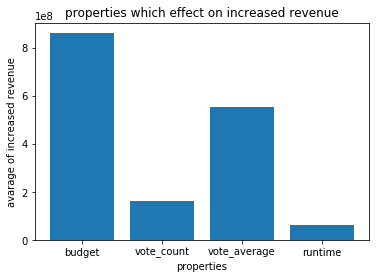

In [21]:
plt.bar( [ 'budget', 'vote_count', 'vote_average','runtime'],
        [budget, vote_count, vote_average, runtime])
plt.title('properties which effect on increased revenue')
plt.xlabel('properties')
plt.ylabel('avarage of increased revenue')

#### looking is there a relationship between vote_count and revenue

Text(0, 0.5, 'Revenue')

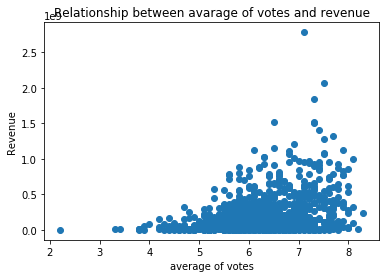

In [22]:
plt.scatter(df['vote_average'], df['revenue'])
plt.title('Relationship between avarage of votes and revenue')
plt.xlabel('average of votes')
plt.ylabel('Revenue')

#### looking is there a relationship between vote_count and revenue

Text(0, 0.5, 'Revenue')

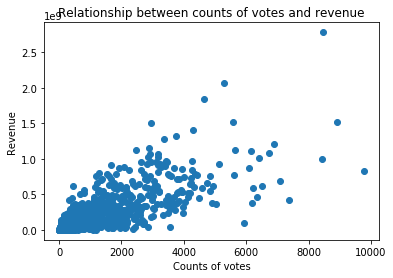

In [23]:
plt.scatter(df['vote_count'], df['revenue'])
plt.title('Relationship between counts of votes and revenue')
plt.xlabel('Counts of votes')
plt.ylabel('Revenue')

#### looking is there a relationship between popularity and revenue

Text(0, 0.5, 'Revenue')

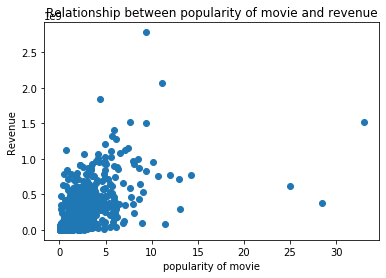

In [24]:
plt.scatter(df['popularity'], df['revenue'])
plt.title('Relationship between popularity of movie and revenue')
plt.xlabel('popularity of movie')
plt.ylabel('Revenue')

<a id='conclusions'></a>
## Conclusions

> As we can see above, there is no correlation between the average of votes and revenue but, there is a positive correlation between counts of vote and revenue what is mean the increase in votes led to increase in revenue. also, the popularity has a positive effect on increase revenue of movie.

>We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.


In [8]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0